In [1]:
pip install fuzzy_pandas

  Using cached fuzzy_pandas-0.1-py3-none-any.whl (5.2 kB)
  Using cached csvmatch-1.20-py2.py3-none-any.whl (13 kB)
  Using cached jellyfish-0.7.2.tar.gz (133 kB)
  Using cached tqdm-4.18.0-py2.py3-none-any.whl (48 kB)
  Using cached Unidecode-1.1.1-py2.py3-none-any.whl (238 kB)
  Using cached simplecosine-1.2-py2.py3-none-any.whl (3.2 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached categorical_distance-1.9-py3-none-any.whl (3.3 kB)
  Using cached dedupe_variable_datetime-0.1.5-py3-none-any.whl (4.8 kB)
  Using cached rlr-2.4.5-py2.py3-none-any.whl (4.8 kB)
  Using cached highered-0.2.1-py2.py3-none-any.whl (3.3 kB)
  Using cached datetime_distance-0.1.3-py3-none-any.whl (4.1 kB)
  Created wheel for jellyfis

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\shefe\Anaconda3\envs\dsc650\python.exe' 'C:\Users\shefe\Anaconda3\envs\dsc650\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\shefe\AppData\Local\Temp\tmp55o6uew0'
       cwd: C:\Users\shefe\AppData\Local\Temp\pip-install-bpxsa9pm\fastcluster
  Complete output (11 lines):
  Fastcluster version: 1.2.3
  Python version: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  copying fastcluster.py -> build\lib.win-amd64-3.6
  running build_ext
  building '_fastcluster' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for fastcluster
ERROR: Could not build wheels f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import csv
import datetime as dt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import fuzzy_pandas as fpd

%matplotlib inline

ModuleNotFoundError: No module named 'fuzzywuzzy'

In [ ]:
df=pd.read_csv("Air_Quality.csv")

In [ ]:
df.head(2)

In [7]:
df.columns

Index(['indicator_data_id', 'indicator_id', 'name', 'Measure', 'geo_type_name',
       'geo_entity_id', 'geo_entity_name', 'year_description',
       'data_valuemessage'],
      dtype='object')

In [8]:
df.rename(columns = {'indicator_data_id' : 'Toxicity_Data_ID', 'indicator_id': 'Toxicity_indicator_ID', 'name' : 'Toxic_Gas_Name', 'Measure':'Toxic_Gas_Measured', 'geo_type_name' : 'Type of Area', 'geo_entity_id' : 'Geo_entity_id', 'geo_entity_name':'Name_geo_entity' ,'year_description': 'Year', 'data_valuemessage':'Data_Value'}, inplace= True)
df.columns

Index(['Toxicity_Data_ID', 'Toxicity_indicator_ID', 'Toxic_Gas_Name',
       'Toxic_Gas_Measured', 'Type of Area', 'Geo_entity_id',
       'Name_geo_entity', 'Year', 'Data_Value'],
      dtype='object')

In [9]:
df.Name_geo_entity

0                           Bronx
1                        Brooklyn
2                       Manhattan
3                          Queens
4                   Staten Island
                  ...            
2764                    Rockaways
2765                Port Richmond
2766       Stapleton - St. George
2767                  Willowbrook
2768    South Beach - Tottenville
Name: Name_geo_entity, Length: 2769, dtype: object

In [10]:
print("Name_geo_entity is duplictaed - {}".format(any(df.Name_geo_entity.duplicated())))

Name_geo_entity is duplictaed - True


In [11]:
df.isnull().tail()

,Toxicity_Data_ID,Toxicity_indicator_ID,Toxic_Gas_Name,Toxic_Gas_Measured,Type of Area,Geo_entity_id,Name_geo_entity,Year,Data_Value
2764,False,False,False,False,False,False,False,False,False
2765,False,False,False,False,False,False,False,False,False
2766,False,False,False,False,False,False,False,False,False
2767,False,False,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False,False,False


In [12]:
df.dtypes

Toxicity_Data_ID           int64
Toxicity_indicator_ID      int64
Toxic_Gas_Name            object
Toxic_Gas_Measured        object
Type of Area              object
Geo_entity_id              int64
Name_geo_entity           object
Year                      object
Data_Value               float64
dtype: object

In [13]:
Toxicity_indicator_ID=df['Toxicity_indicator_ID']
Geo_entity_id =df['Geo_entity_id']
Toxicity_Data_ID= df['Toxicity_Data_ID']

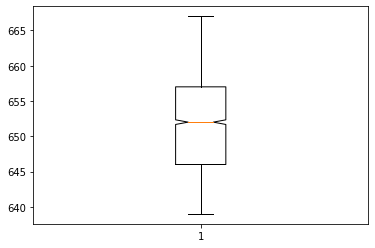

In [14]:
#df.boxplot(column=['Geo_entity_id', 'Name_geo_entity'])
bp1=plt.boxplot(df.Toxicity_indicator_ID, notch=True)

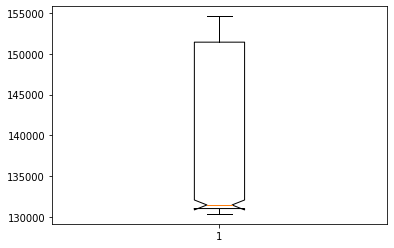

In [15]:
bp2=plt.boxplot(df.Toxicity_Data_ID, notch=True)

In [31]:
choices = ['Type of Area', 'Name_geo_entity', 'Toxic_Gas_Name']
process.extract("Toxic_Gas_Name", choices, scorer=fuzz.ratio)

[('Toxic_Gas_Name', 100), ('Type of Area', 31), ('Name_geo_entity', 28)]

In [22]:
df.stack()

0     indicator_data_id                                               130728
      indicator_id                                                       646
      name                 Air Toxics Concentrations- Average Benzene Con...
      Measure                                          Average Concentration
      geo_type_name                                                  Borough
                                                 ...                        
2768  geo_type_name                                                    UHF42
      geo_entity_id                                                      504
      geo_entity_name                              South Beach - Tottenville
      year_description                                                  2005
      data_valuemessage                                                  0.3
Length: 24888, dtype: object

In [35]:
def get_ratio(row):
    name = row['Toxic_Gas_Measured']
    return fuzz.token_sort_ratio(name, "Average Concentration")

df[df.apply(get_ratio, axis=1) > 70]

KeyError: ('Toxic_Gas_Measured', 'occurred at index 0')